In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/games_of_all_time.csv')
data.info()
model_data = data[['meta_score','user_score','platform','genre','type','rating']] 
model_data = model_data.dropna()
#model_data.info()
#model_data.head(5)
# exploding genre multiple values into indiviidual rows
from ast import literal_eval
model_data['genre']=model_data['genre'].apply(literal_eval)
#print(model_data['genre'].apply(type))
#model_data.head(5)
#model_data.explode('genre')
model_data = model_data.explode('genre', 'true')
# exploding platform multiple values into individual rows
model_data['platform']=model_data['platform'].apply(literal_eval)
#print(model_data['platform'].apply(type))
model_data = model_data.explode('platform', 'true')
model_data.info()
model_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8821 non-null   object 
 7   genre        8827 non-null   object 
 8   type         6727 non-null   object 
 9   rating       7691 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28052 entries, 0 to 28051
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meta_score  28052 non-null  float64
 1   user_score  28052 non-null  float64
 2   platform    28052 non-null  object 
 3   genre       28052

,meta_score,user_score,platform,genre,type,rating
0,99.0,91.0,nintendo-64,Action Adventure,singleplayer,E
1,99.0,91.0,nintendo-64,Fantasy,singleplayer,E
2,97.0,91.0,wii,Action,singleplayer,E
3,97.0,91.0,wii,Platformer,singleplayer,E
4,97.0,91.0,wii,3D,singleplayer,E
5,97.0,91.0,wii,Action,singleplayer,E
6,97.0,91.0,wii,Platformer,singleplayer,E
7,97.0,91.0,wii,3D,singleplayer,E
8,97.0,89.0,gamecube,Action,singleplayer,T
9,97.0,89.0,gamecube,Shooter,singleplayer,T


In [3]:
model_data['genre'].value_counts()

Action              2864
General             1885
Action Adventure    1333
Shooter             1096
Role-Playing        1019
                    ... 
Tank                   1
Videos                 1
Drag                   1
Text                   1
WWI                    1
Name: genre, Length: 166, dtype: int64

In [4]:
#should we remove the genre values which have less data ?
sub_model_data = model_data[model_data.groupby('genre').genre.transform('count')>100].copy()

In [5]:
sub_model_data.info()
sub_model_data['genre'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25205 entries, 0 to 28051
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meta_score  25205 non-null  float64
 1   user_score  25205 non-null  float64
 2   platform    25205 non-null  object 
 3   genre       25205 non-null  object 
 4   type        25205 non-null  object 
 5   rating      25205 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.3+ MB


Action               2864
General              1885
Action Adventure     1333
Shooter              1096
Role-Playing         1019
Sports                907
Arcade                902
Miscellaneous         808
First-Person          753
3D                    690
Strategy              658
Platformer            638
2D                    618
Racing                574
Traditional           567
Sci-Fi                555
Adventure             550
Modern                542
Fantasy               528
Driving               492
Sim                   468
Third-Person          464
Simulation            445
Action RPG            426
Automobile            335
Fighting              319
Team                  289
Beat-'Em-Up           278
Open-World            270
Real-Time             262
Puzzle                256
Historic              252
Turn-Based            246
Compilation           222
Individual            221
Japanese-Style        199
Survival              181
Tactical              177
Console-styl

In [6]:
sub_model_data['genre'].nunique()

53

In [7]:
sub_model_data['platform'].value_counts()

pc                  5453
xbox-360            2571
playstation-4       2546
playstation-2       2247
playstation-3       2209
switch              1863
xbox                1335
xbox-one            1325
ds                  1094
wii                  970
psp                  936
gamecube             785
game-boy-advance     604
3ds                  314
playstation-vita     274
playstation          235
wii-u                164
playstation-5        111
nintendo-64           88
xbox-series-x         47
dreamcast             29
stadia                 5
Name: platform, dtype: int64

In [8]:
#should we replace multiple similar platform values to a single value e.g ps1,ps2 as ps
sub_model_data['platform']=sub_model_data['platform'].replace(['playstation-4','playstation-3','playstation-2',
                                                               'playstation-vita','playstation-5'],'playstation')
sub_model_data['platform']=sub_model_data['platform'].replace(['xbox-360','xbox-one','xbox-series-x'],'xbox')
sub_model_data['platform']=sub_model_data['platform'].replace(['wii-u'],'wii')

In [9]:
sub_model_data['platform'].value_counts()

playstation         7622
pc                  5453
xbox                5278
switch              1863
wii                 1134
ds                  1094
psp                  936
gamecube             785
game-boy-advance     604
3ds                  314
nintendo-64           88
dreamcast             29
stadia                 5
Name: platform, dtype: int64

In [10]:
#hot encoding
encoded_sub_model_data= pd.get_dummies(sub_model_data, columns=['platform','genre','type','rating'],prefix=['platform','genre','type','rating'])

In [11]:
encoded_sub_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25205 entries, 0 to 28051
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   meta_score                 25205 non-null  float64
 1   user_score                 25205 non-null  float64
 2   platform_3ds               25205 non-null  uint8  
 3   platform_dreamcast         25205 non-null  uint8  
 4   platform_ds                25205 non-null  uint8  
 5   platform_game-boy-advance  25205 non-null  uint8  
 6   platform_gamecube          25205 non-null  uint8  
 7   platform_nintendo-64       25205 non-null  uint8  
 8   platform_pc                25205 non-null  uint8  
 9   platform_playstation       25205 non-null  uint8  
 10  platform_psp               25205 non-null  uint8  
 11  platform_stadia            25205 non-null  uint8  
 12  platform_switch            25205 non-null  uint8  
 13  platform_wii               25205 non-null  uin

In [12]:
from sklearn.model_selection import train_test_split
X = encoded_sub_model_data.drop(columns=['user_score','meta_score']).values
y = encoded_sub_model_data[['user_score']].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
#Tensor flow linear regression model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
model = Sequential()
model.add(Dense(1,activation='relu'))



model.compile(optimizer='sgd',loss='mse')

C:\spring22\anaconda3\envs\255_project\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\spring22\anaconda3\envs\255_project\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\spring22\anaconda3\envs\255_project\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\spring22\anaconda3\envs\255_project\lib\site-packages\tensorf

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
X_train=X_train/256.
model.fit(X_train,
          y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=300)
# regression coefficients
#print('Coefficients: ', regModel.coef_)

Train on 17643 samples, validate on 7562 samples
Epoch 1/300
17643/17643 [==============================] - 0s 18us/sample - loss: 1101.7728 - val_loss: 178.9472
Epoch 2/300
17643/17643 [==============================] - 0s 9us/sample - loss: 167.7311 - val_loss: 159.0142
Epoch 3/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3292 - val_loss: 158.8633
Epoch 4/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3135 - val_loss: 158.8551
Epoch 5/300
17643/17643 [==============================] - 0s 11us/sample - loss: 164.3181 - val_loss: 158.8114
Epoch 6/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3048 - val_loss: 158.8135
Epoch 7/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3147 - val_loss: 158.8016
Epoch 8/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3161 - val_loss: 158.7919
Epoch 9/300
17643/17643 [==============================] 

17643/17643 [==============================] - 0s 9us/sample - loss: 164.2932 - val_loss: 157.9865
Epoch 74/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3049 - val_loss: 157.9701
Epoch 75/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3105 - val_loss: 158.0371
Epoch 76/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3083 - val_loss: 158.0091
Epoch 77/300
17643/17643 [==============================] - 0s 12us/sample - loss: 164.3069 - val_loss: 158.0232
Epoch 78/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3031 - val_loss: 157.9829
Epoch 79/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3117 - val_loss: 158.0065
Epoch 80/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3073 - val_loss: 157.9754
Epoch 81/300
17643/17643 [==============================] - 0s 12us/sample - loss: 164.3101 - val_loss: 157.9754

17643/17643 [==============================] - 0s 9us/sample - loss: 164.2961 - val_loss: 157.4650
Epoch 146/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3060 - val_loss: 157.5278
Epoch 147/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2944 - val_loss: 157.5863
Epoch 148/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3074 - val_loss: 157.5873
Epoch 149/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3086 - val_loss: 157.5571
Epoch 150/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3040 - val_loss: 157.4485
Epoch 151/300
17643/17643 [==============================] - 0s 11us/sample - loss: 164.3056 - val_loss: 157.5158
Epoch 152/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.3058 - val_loss: 157.4832
Epoch 153/300
17643/17643 [==============================] - 0s 12us/sample - loss: 164.3019 - val_loss: 15

17643/17643 [==============================] - 0s 8us/sample - loss: 164.2942 - val_loss: 157.3215
Epoch 218/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.2972 - val_loss: 157.3169
Epoch 219/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3004 - val_loss: 157.3971
Epoch 220/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2984 - val_loss: 157.3713
Epoch 221/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2971 - val_loss: 157.3537
Epoch 222/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2984 - val_loss: 157.3708
Epoch 223/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3012 - val_loss: 157.3633
Epoch 224/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3004 - val_loss: 157.2981
Epoch 225/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.3028 - val_loss: 157.3

17643/17643 [==============================] - 0s 9us/sample - loss: 164.2965 - val_loss: 157.5116
Epoch 290/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2925 - val_loss: 157.6020
Epoch 291/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2950 - val_loss: 157.5601
Epoch 292/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.2912 - val_loss: 157.5381
Epoch 293/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2905 - val_loss: 157.4345
Epoch 294/300
17643/17643 [==============================] - 0s 10us/sample - loss: 164.2892 - val_loss: 157.5370
Epoch 295/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2950 - val_loss: 157.5236
Epoch 296/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2989 - val_loss: 157.5808
Epoch 297/300
17643/17643 [==============================] - 0s 9us/sample - loss: 164.2927 - val_loss: 157.

In [16]:
from tensorflow.keras.models import load_model
model.save('aditya_model')
# variance score: 1 means perfect prediction
#print('Variance score: {}'.format(regModel.score(X_test, y_test)))

In [17]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

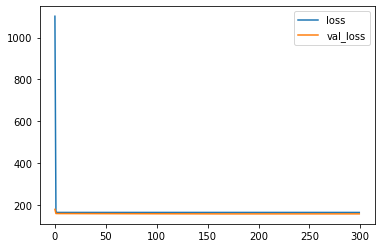

In [18]:
losses[['loss','val_loss']].plot()

In [19]:
X_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
prediction = model.predict(X_test)
prediction

array([[73.029434],
       [69.448135],
       [70.93811 ],
       ...,
       [71.868935],
       [72.73559 ],
       [68.244804]], dtype=float32)

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mean_absolute_error(y_test,prediction)

9.700937209473626

In [22]:
np.sqrt(mean_squared_error(y_test,prediction))

12.551337568379996

In [23]:
explained_variance_score(y_test,prediction)

0.011027889594490303

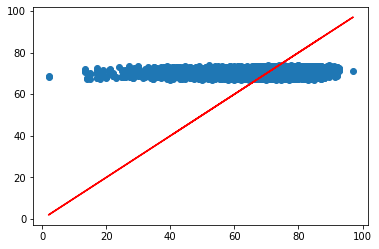

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,'r')

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train,y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [28]:
pipe.score(X_test, y_test)


-2.3818263326482395e+29

In [29]:
y_pred= pipe.predict(X_test)
y_pred

array([[-6.15249079e+15],
       [-6.15249079e+15],
       [-6.15249079e+15],
       ...,
       [-6.15249079e+15],
       [-6.15249079e+15],
       [-6.15249079e+15]])

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#should be between 0-1
score =r2_score(y_test,y_pred)
print("r2 score is:",score)

r2 score is: -2.3818263326482395e+29


In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=1000,random_state=0)
rf_model.fit(X_train,np.ravel(y_train))

RandomForestRegressor(n_estimators=1000, random_state=0)

In [32]:
rf_model.score(X_test,y_test)

-0.01445098204704598